# Predictive Modeling of Customer Behavior and Employment Trends Using Demographic and Economic Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Customer and Economic Dataset Information
In this project, we aim to explore the relationship between customer characteristics, economic indicators, and key outcomes to develop predictive models that can support decision-making. The dataset contains customer demographic details and economic factors, which can help businesses and policymakers understand customer behavior and economic trends.

Each row in the dataset contains the following information:

* age: The age of the customer.
* marital: The marital status of the customer (e.g., married, single).
* housing: Whether the customer has a housing loan (yes/no).
* loan: Whether the customer has a personal loan (yes/no).
* contact: The type of communication used to contact the customer (e.g., cellular, telephone).
* campaign: The number of contacts performed during this campaign.
* emp.var.rate: Employment variation rate (an economic indicator).
* cons.price.idx: Consumer price index (an economic indicator).
* euribor3m: Euribor three-month rate (an economic indicator).
* nr.employed: The number of employees (used as the dependent variable for linear regression).

### Research Introduction and Motivation
This research aims to develop predictive models to help businesses and policymakers make decisions using customer and economic data. For example, banks can use a logistic regression model to predict the likelihood of a customer taking a loan for targeted marketing. Policymakers can use a linear regression model to forecast employment trends for better planning.

A loan officer may prioritize identifying customers likely to take a loan ("positives") to increase revenue, but balanced accuracy for both "positives" and "negatives" is also important to avoid inefficient targeting.

### Citation that support my motivation
Strehl, A., Ghosh, J., & Mooney, R. J. (2002). Impact of similarity measures on web-page clustering. Workshop on Artificial Intelligence for Web Search.
This citation supports the claim about enhancing customer segmentation and targeted marketing through predictive models.

Stock, J. H., & Watson, M. W. (1999). Forecasting inflation. Journal of Monetary Economics, 44(2), 293–335.
This citation supports the claim about using predictive models for understanding economic trends and forecasting employment.

### Research Goal Statement
The primary research goal of this project is `To build a logistic regression model that predicts the likelihood of a customer taking a loan (loan: yes/no) based on demographic and economic characteristics.`

The secondary research goal is to ensure that both models are interpretable, allowing for a clear understanding of how each feature contributes to the predictions. This interpretability is crucial for deriving actionable insights and making informed decisions.

## 2. Dataset Discussion

On April 22, 2025, I downloaded a CSV file related to the marketing campaigns of a Portuguese banking institution. This dataset, titled "Bank Marketing," was obtained from the UCI Machine Learning Repository. The campaigns in the dataset were based on phone calls, often involving multiple contacts with the same client to determine whether they would subscribe to a bank term deposit. The dataset can be accessed at https://archive.ics.uci.edu/dataset/222/bank+marketing.


The rows in this dataset represent individual customers, with each entry including demographic details, economic indicators, and interactions during a Portuguese bank's phone-based marketing campaign. The dataset was collected from these campaigns, where customers were contacted to assess their interest in subscribing to a term deposit. However, it is not inclusive of all possible observations, as it excludes customers reached through other channels (e.g., email) or those not targeted in the campaign. This limitation affects the generalizability of the findings, as predictions and insights may not apply to customers outside this specific group, potentially reducing the effectiveness of broader marketing or policy strategies.

The response variable loan. The explanatory variables are emp.var.rate, cons.price.idx, euribor3m, age, housing, nr.employed and campaign, chosen for their relevance to macroeconomic trends and customer behavior, which are key to understanding employment dynamics.

In [3]:
with open("bank dataset.csv", encoding="utf-8") as f:
    lines = f.readlines()

# manually split data (originally not in columns but strings seperated by ";") into columns
columns = lines[0].strip().split(";")
data = [line.strip().split(";") for line in lines[1:]]

df = pd.DataFrame(data, columns=columns)

# strip unnecessary "s
df.columns = [col.replace('"', '').strip() for col in df.columns]
df = df.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)
df

/var/folders/st/nc2fpg710b7095gl4qp0ql3w0000gn/T/ipykernel_63925/1967028457.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
df = df[['age', 'marital', 'housing', 'loan', 'contact', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m','nr.employed']]
df.head(5)

,age,marital,housing,loan,contact,campaign,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,30,married,yes,no,cellular,2,-1.8,92.893,1.313,5099.1
1,39,single,no,no,telephone,4,1.1,93.994,4.855,5191
2,25,married,yes,no,telephone,1,1.4,94.465,4.962,5228.1
3,38,married,unknown,unknown,telephone,3,1.4,94.465,4.959,5228.1
4,47,married,yes,no,cellular,1,-0.1,93.2,4.191,5195.8


In [5]:
len(df)

4119

## 3. Dataset Cleaning

During the cleaning process, I addressed two types of missing values: explicit and implicit.

* Explicit Missing Values: These include missing entries represented by NaN, empty strings, or similar indicators in the dataset.

* Implicit Missing Values: These are represented by specific placeholders like 'unknown' in the loan column. These entries were treated as missing because they do not provide meaningful information for analysis.

However, not all instances of 'unknown' were treated as missing values. For example, 'unknown' in the marital column was not considered an effective missing value, as it may still provide valid information for certain analyses.

To handle these missing values, I used appropriate techniques such as dropping rows or imputing values based on the context. This ensured the dataset remained clean and ready for analysis while minimizing the loss of valuable information.

Pros and Cons of leaving outliers in a dataset that I plan to use for modelling purpose.
Pros:
* Potential Better Non-Outlier Performance: In the event that your outliers are far away from the best fit line that exists for the non-outlier points, deleting them may improve performance for the non-outlier points. Your linear regression model will thus be more effective at predicting the non-outlier points.

Cons:
* Less Representative Data
* Potentially Worse Outlier Performance. In the event that our non-outliers are far away from the best fit line that exists for the non-outlier points, dropping the outliers will result in a best fit line that is not as effective at predicting the price of the outlier points.

In [6]:
df.isna().sum()

age               0
marital           0
housing           0
loan              0
contact           0
campaign          0
emp.var.rate      0
cons.price.idx    0
euribor3m         0
nr.employed       0
dtype: int64

In [7]:
df.dtypes

age               object
marital           object
housing           object
loan              object
contact           object
campaign          object
emp.var.rate      object
cons.price.idx    object
euribor3m         object
nr.employed       object
dtype: object

In [8]:
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'age': ['30' '39' '25' '38' '47' '32' '41' '31' '35' '36' '29' '27' '44' '46'
 '45' '50' '55' '40' '28' '34' '33' '51' '48' '20' '76' '56' '24' '58'
 '60' '37' '52' '42' '49' '54' '59' '57' '43' '53' '75' '82' '71' '21'
 '22' '23' '26' '81' '61' '67' '73' '18' '64' '74' '77' '86' '85' '63'
 '88' '78' '72' '68' '80' '66' '19' '62' '65' '69' '70']
Unique values in 'marital': ['married' 'single' 'divorced' 'unknown']
Unique values in 'housing': ['yes' 'no' 'unknown']
Unique values in 'loan': ['no' 'unknown' 'yes']
Unique values in 'contact': ['cellular' 'telephone']
Unique values in 'campaign': ['2' '4' '1' '3' '6' '7' '27' '5' '12' '14' '10' '8' '11' '13' '9' '15'
 '16' '18' '17' '22' '19' '23' '24' '35' '29']
Unique values in 'emp.var.rate': ['-1.8' '1.1' '1.4' '-0.1' '-1.1' '-2.9' '-1.7' '-3.4' '-3' '-0.2']
Unique values in 'cons.price.idx': ['92.893' '93.994' '94.465' '93.2' '94.199' '93.918' '93.444' '93.369'
 '92.843' '92.963' '94.601' '94.027' '92.379' '92.431' '93

In [9]:
numerical_columns = ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col])

print(df.dtypes)

age                 int64
marital            object
housing            object
loan               object
contact            object
campaign            int64
emp.var.rate      float64
cons.price.idx    float64
euribor3m         float64
nr.employed       float64
dtype: object


/var/folders/st/nc2fpg710b7095gl4qp0ql3w0000gn/T/ipykernel_63925/3515429520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])


In [10]:
df.isna().sum()

age               0
marital           0
housing           0
loan              0
contact           0
campaign          0
emp.var.rate      0
cons.price.idx    0
euribor3m         0
nr.employed       0
dtype: int64

In [11]:
categorical_cols = ['marital', 'housing', 'loan', 'contact']
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'marital': ['married' 'single' 'divorced' 'unknown']
Unique values in 'housing': ['yes' 'no' 'unknown']
Unique values in 'loan': ['no' 'unknown' 'yes']
Unique values in 'contact': ['cellular' 'telephone']


In [12]:
df_clean = df[df.loan != 'unknown']

The loan variable is a categorical variable with three possible values: Yes, No, and Unknown. We consider "Unknown" as an implicit missing value because it does not provide any meaningful information about loan usage.

In [13]:
len(df) - len(df_clean)

105

In [14]:
numerical_var = df_clean[['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m','nr.employed']]

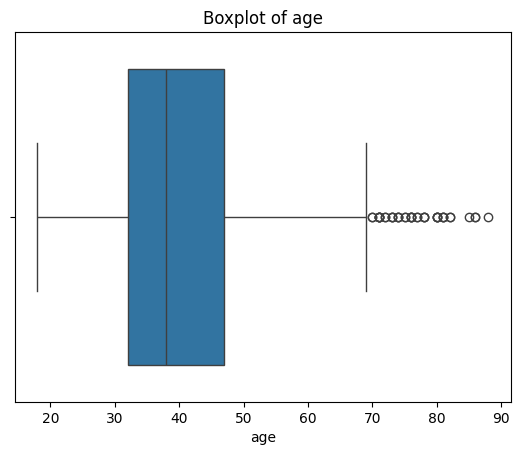

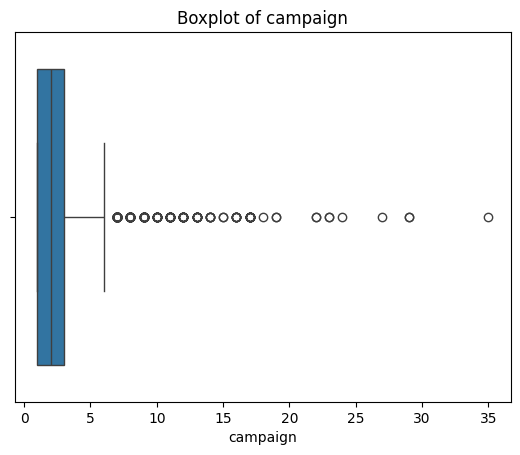

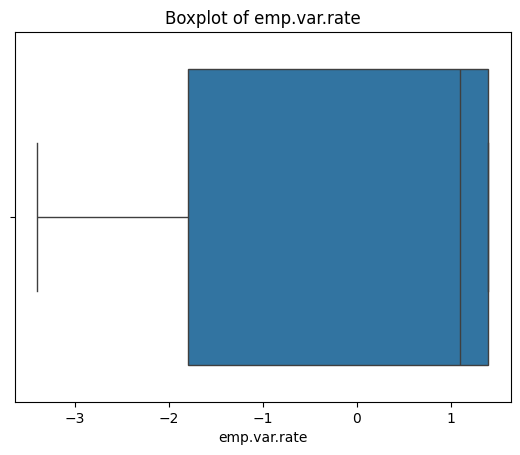

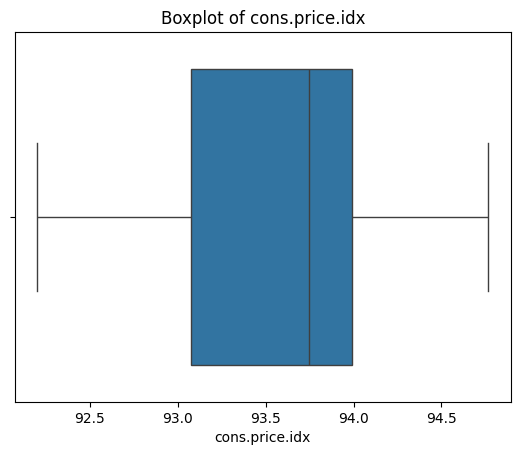

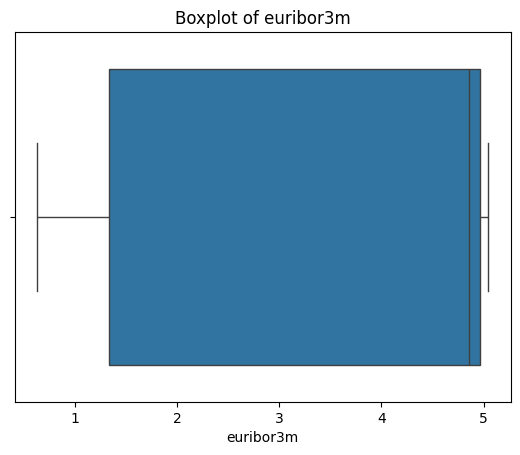

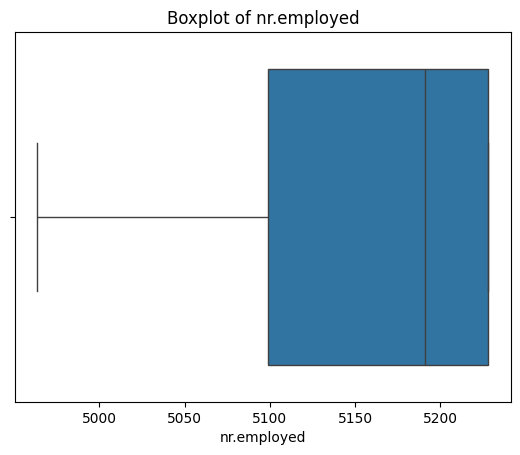

In [15]:
for col in numerical_var.columns:
    sns.boxplot(x=numerical_var[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Pros and Cons of leaving outliers in a dataset that I plan to use for modelling purpose.
Pros:
* Potential Better Non-Outlier Performance: In the event that your outliers are far away from the best fit line that exists for the non-outlier points, deleting them may improve performance for the non-outlier points. Your linear regression model will thus be more effective at predicting the non-outlier points.

Cons:
* Less Representative Data
* Potentially Worse Outlier Performance. In the event that our non-outliers are far away from the best fit line that exists for the non-outlier points, dropping the outliers will result in a best fit line that is not as effective at predicting the price of the outlier points.

I decided to not to drop the outliers. This is because I want to keep the originality and representative of our dataset.

Please note that: The categorical explanatory variables in the dataset contain some instances of the value "unknown," as seen in variables like 'marital'  and  'housing'. While we acknowledge the presence of "unknown" in these variables, it is unclear whether this represents meaningful information or simply missing data. Therefore, we have decided to retain these values for further analysis rather than making assumptions about their significance at this stage.

## 4. Preliminary Analysis

### 4.1 Relationship between numerical explanatory variables and response variable.

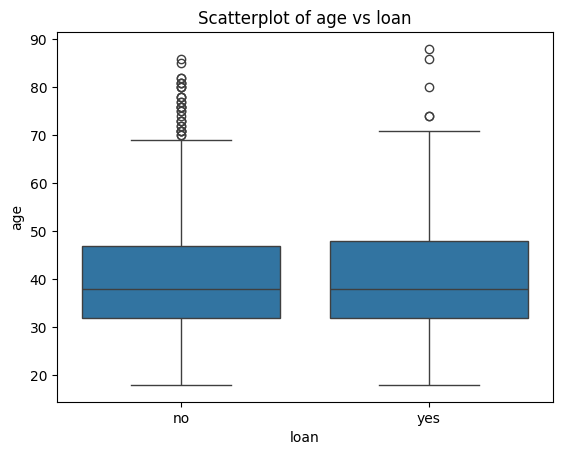

<Figure size 600x400 with 0 Axes>

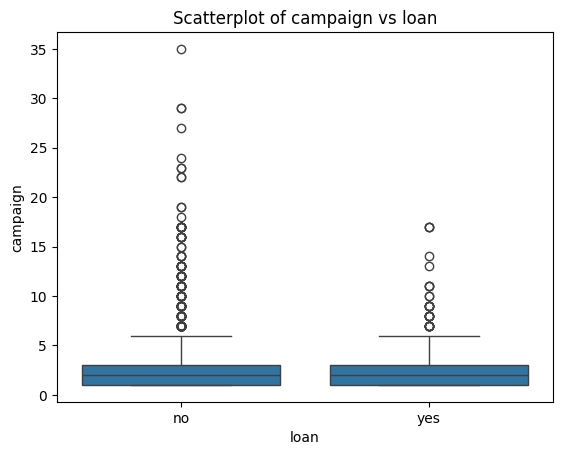

<Figure size 600x400 with 0 Axes>

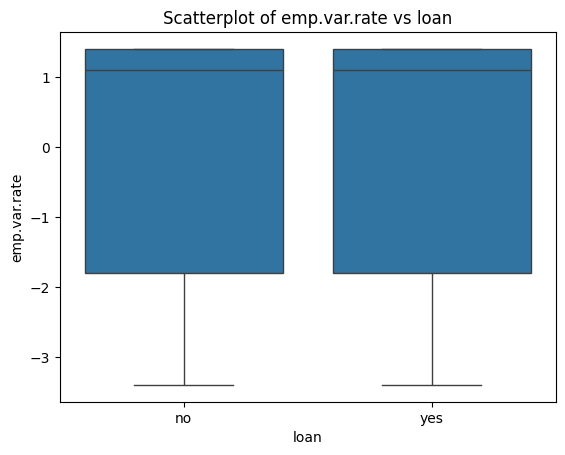

<Figure size 600x400 with 0 Axes>

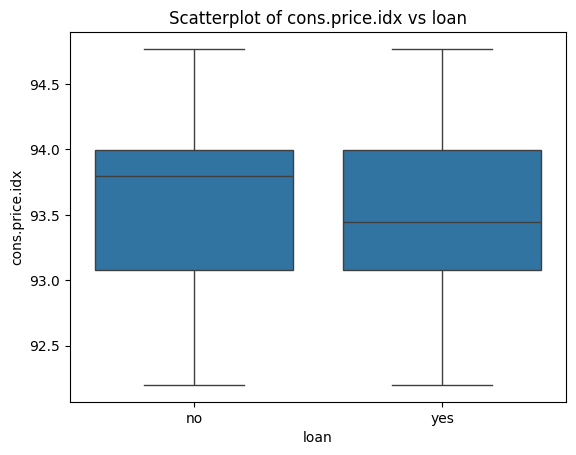

<Figure size 600x400 with 0 Axes>

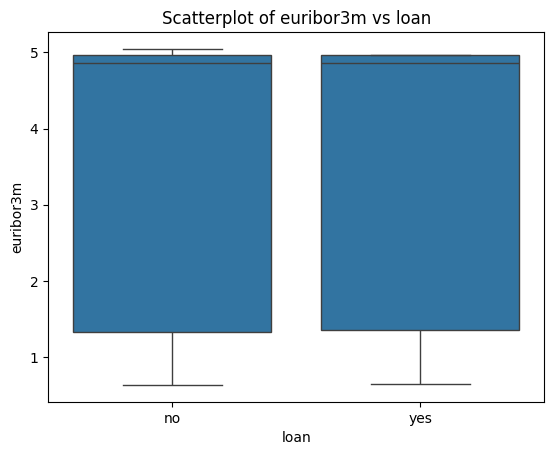

<Figure size 600x400 with 0 Axes>

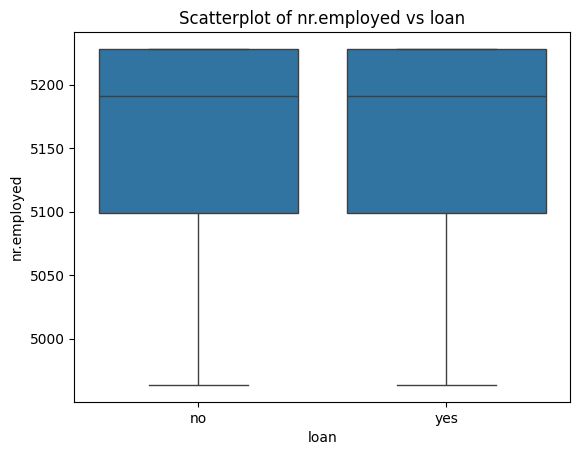

<Figure size 600x400 with 0 Axes>

In [16]:
for col in numerical_var.columns:
        sns.boxplot(y=numerical_var[col], x=df_clean['loan'])
        plt.title(f"Scatterplot of {col} vs loan")
        plt.xlabel("loan")
        plt.ylabel(col)
        plt.figure(figsize=(6, 4))
        plt.show()

While we do not observe a clear and obvious relationship between most numerical variables and the response variable, we notice that the variable cons.price.idx shows a difference in mean values across the different categories of the loan variable. This suggests a potential relationship that may warrant further investigation, though it is not immediately definitive.

### 4.2 Relationship between categorical explanatory variables and response variable.

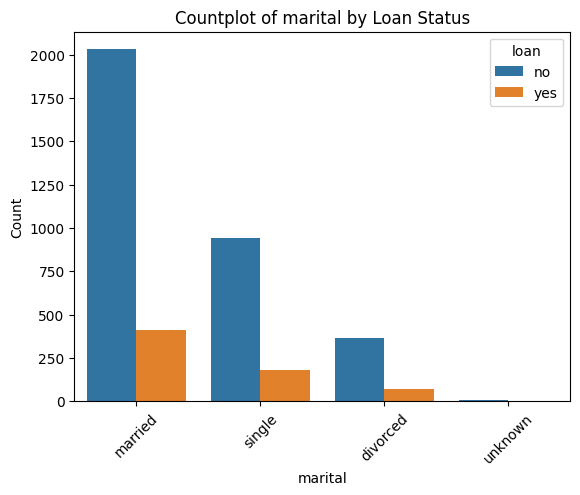

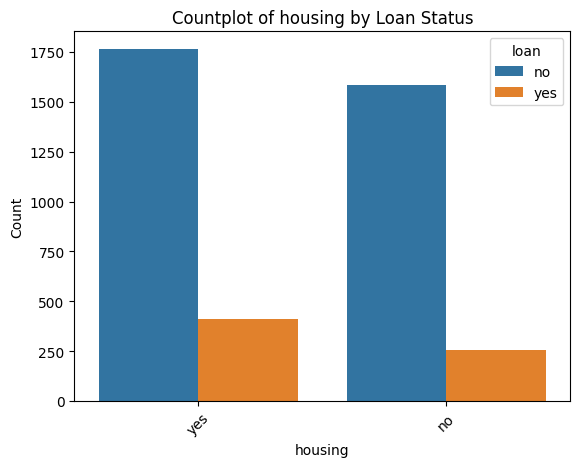

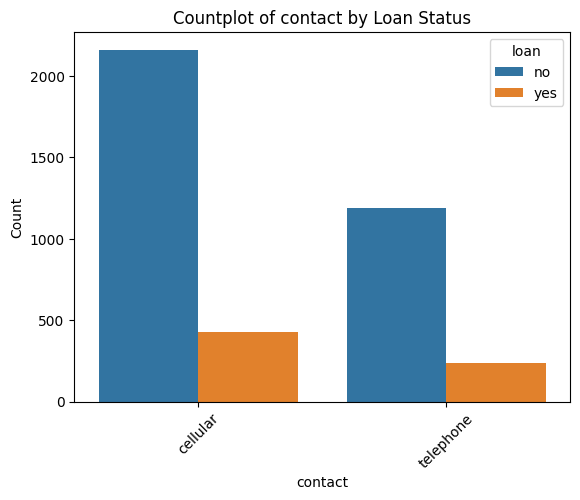

In [17]:
categorical_var = df_clean[['marital', 'housing', 'contact']]

for cat in categorical_var.columns:
    sns.countplot(x=cat, hue='loan', data=df_clean)
    plt.title(f"Countplot of {cat} by Loan Status")
    plt.xlabel(cat)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

There is strong relationship between marital and loan. This is because we do see at least one color had at least two bars that were significantly different in height. However, the relationship between housing and loan is weak.

### 4.3 Relationship between categorical explanatory varibales pairs

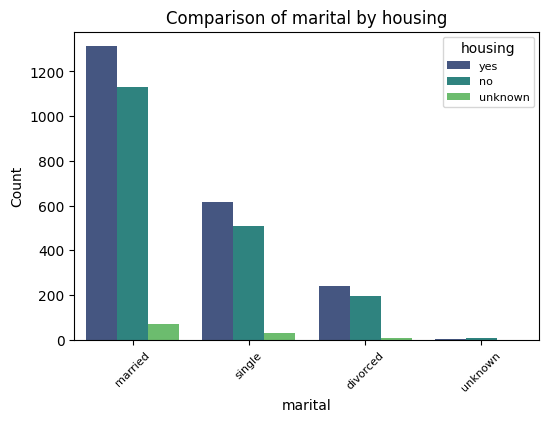

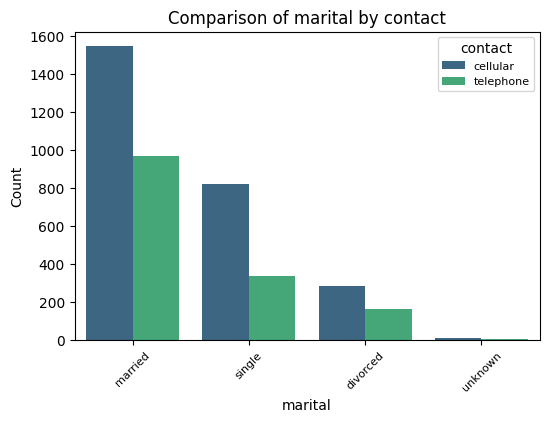

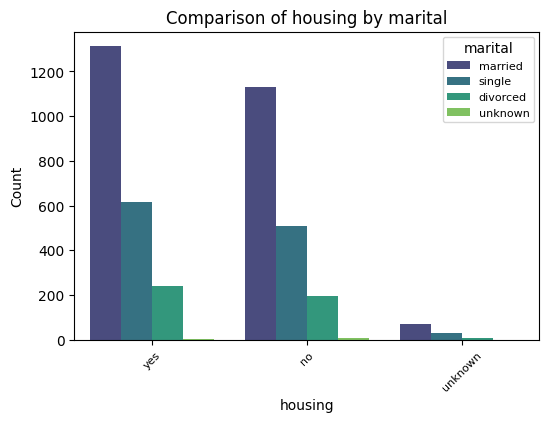

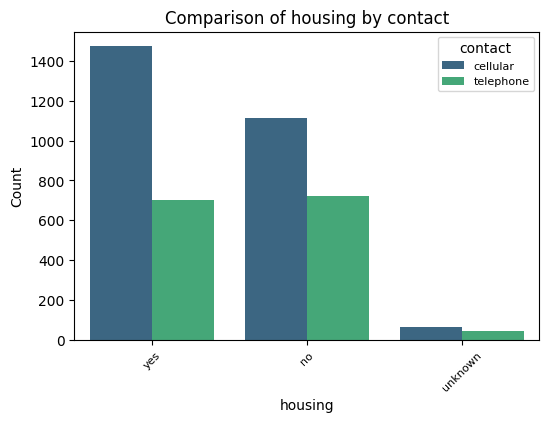

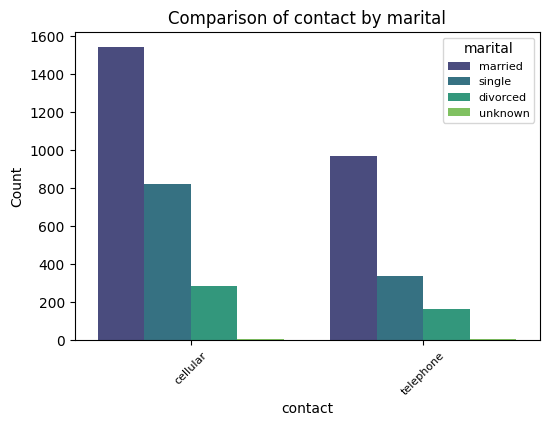

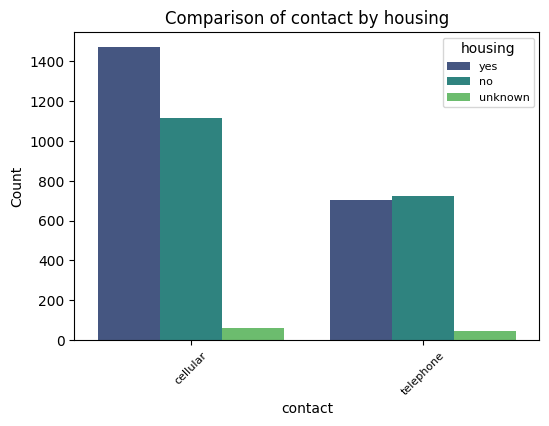

In [18]:
categorical_var = df_clean[['marital', 'housing', 'contact']] 
for col1 in categorical_var.columns:
    for col2 in categorical_var.columns:
        if col1 != col2:
            plt.figure(figsize=(6, 4))
            sns.countplot(data=df, x=col1, hue=col2, palette='viridis')
            plt.title(f"Comparison of {col1} by {col2}", fontsize=12)
            plt.xlabel(col1, fontsize=10)
            plt.ylabel("Count", fontsize=10)
            plt.xticks(rotation=45, fontsize=8)
            plt.legend(title=col2, fontsize=8, title_fontsize=10)
            plt.show()

There is an association between marital status and housing, marital status and loan, marital status and contact, as well as loan and marital status, loan and housing, and loan and contact. This conclusion is supported by the observation that at least one color (representing a category) in the bar plots differs in height across the groups. Among them, the relationship between marital and housing, matital and contact are strong. 

### 4.4 Relationship between numerical explanatory variables pairs.

In [19]:
numerical_exp_var = df_clean[['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m']]

In [20]:
numerical_exp_var.corr()

,age,campaign,emp.var.rate,cons.price.idx,euribor3m
age,1.000000,-0.015357,-0.020451,-0.002164,-0.015614
campaign,-0.015357,1.000000,0.174160,0.145238,0.157801
emp.var.rate,-0.020451,0.174160,1.000000,0.755450,0.970314
cons.price.idx,-0.002164,0.145238,0.755450,1.000000,0.657237
euribor3m,-0.015614,0.157801,0.970314,0.657237,1.000000


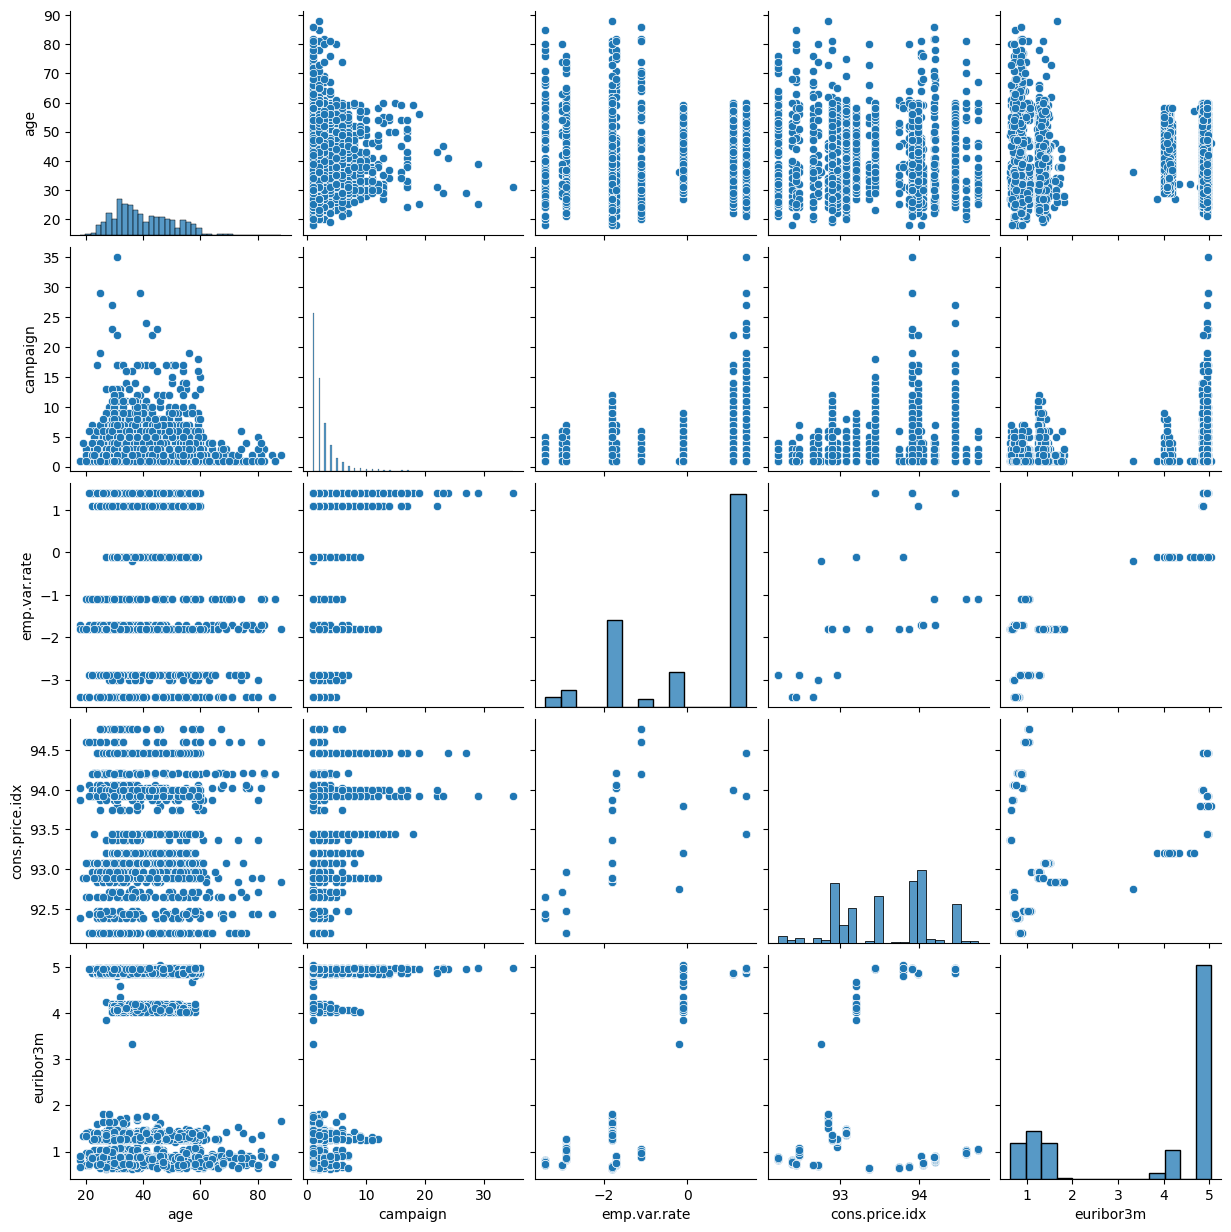

In [21]:
sns.pairplot(numerical_exp_var)

Both cons.price.idx and euribor3m have strong relation with emp.var.rate as they share the correaltion > 0.7 with emp.var.rate.

### 4.5 Interaction Effects

In [22]:
df_clean['loan_binary'] = df_clean['loan'].map({'yes': 1, 'no': 0})

/var/folders/st/nc2fpg710b7095gl4qp0ql3w0000gn/T/ipykernel_63925/876987112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['loan_binary'] = df_clean['loan'].map({'yes': 1, 'no': 0})


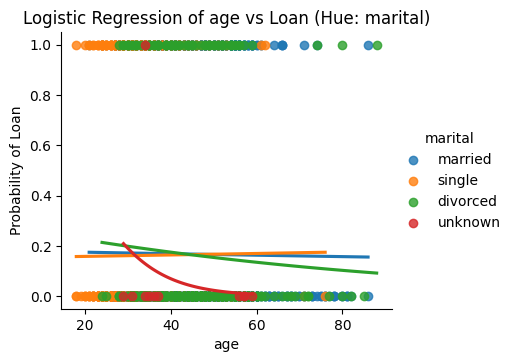

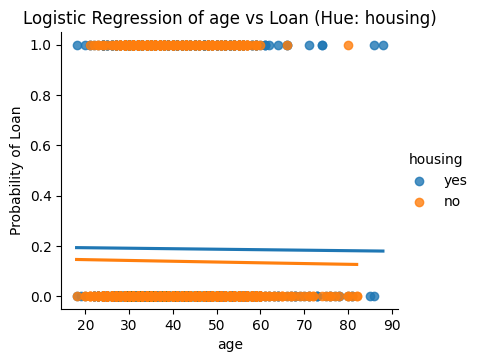

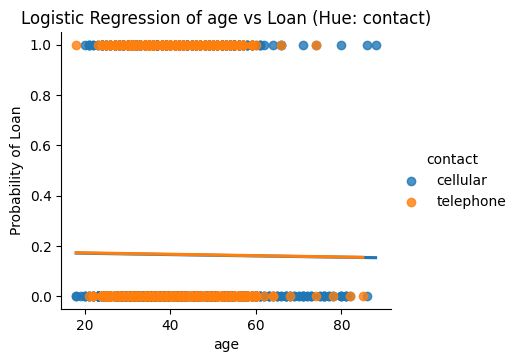

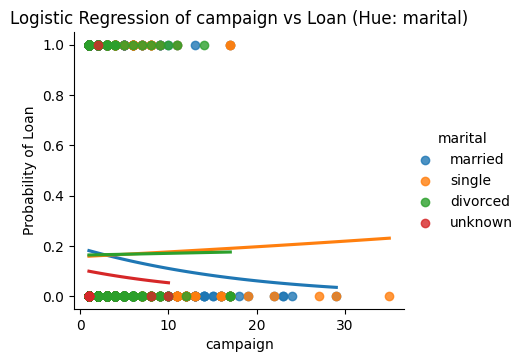

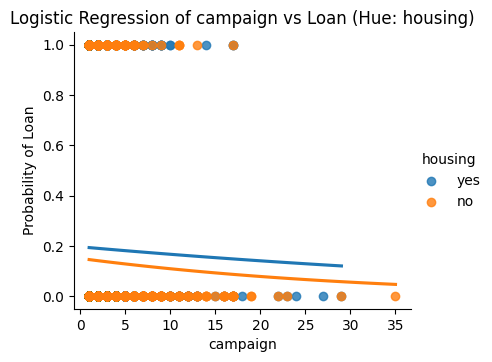

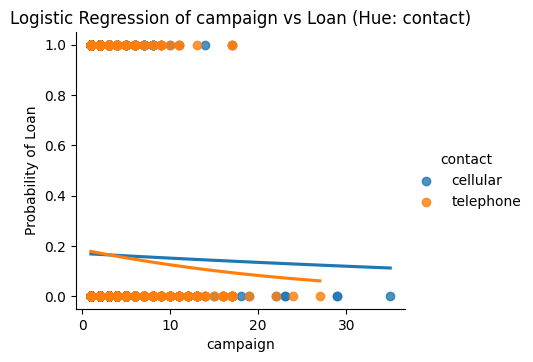

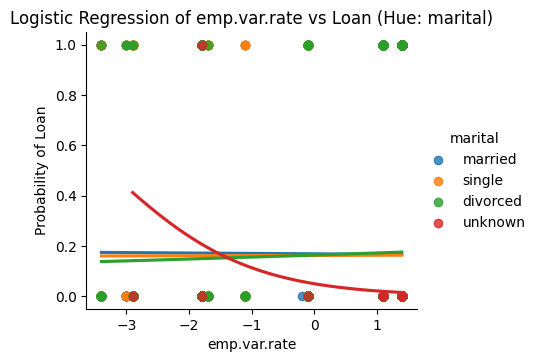

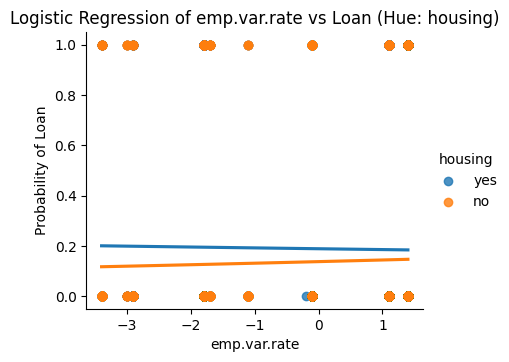

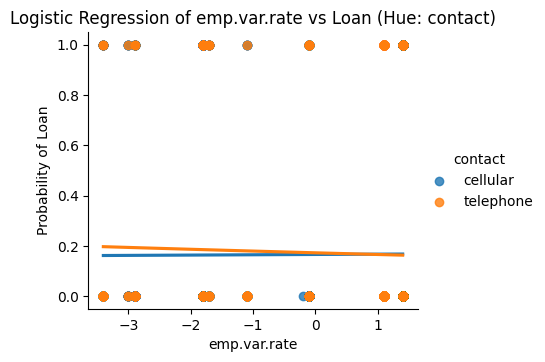

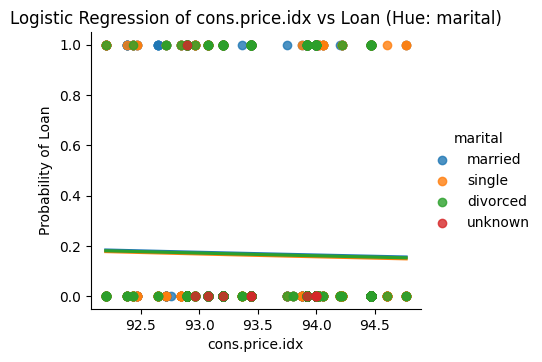

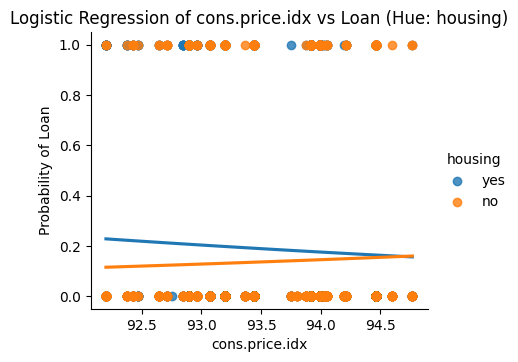

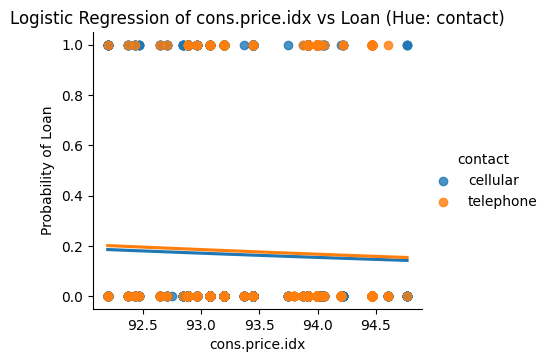

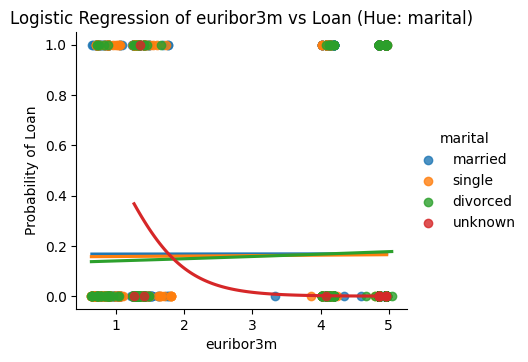

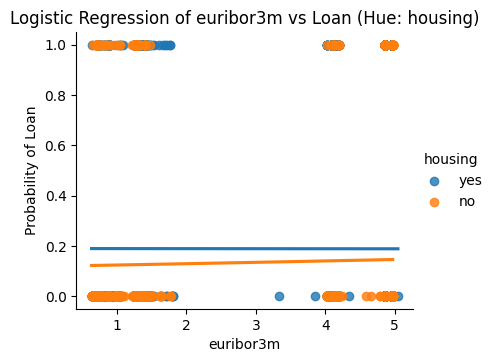

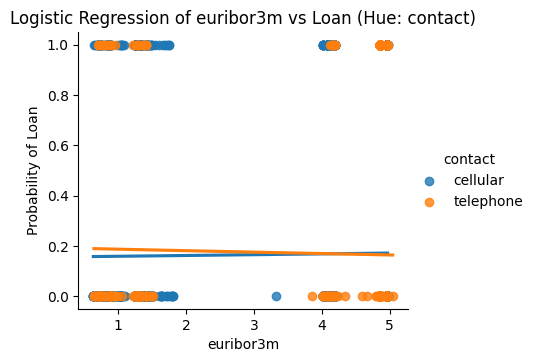

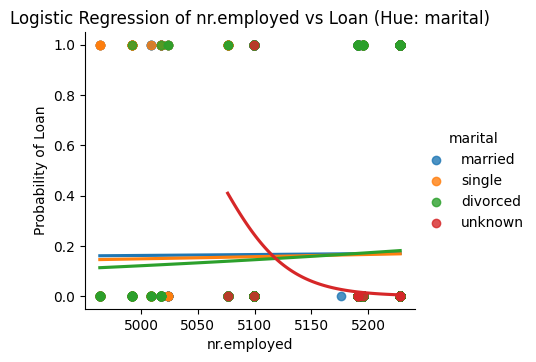

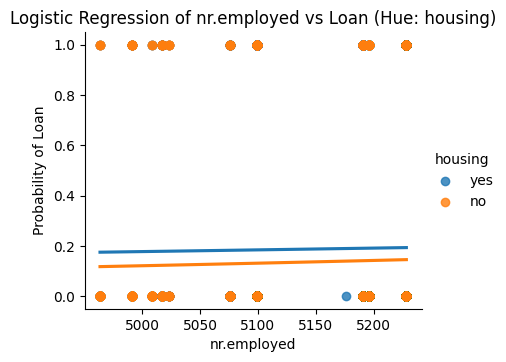

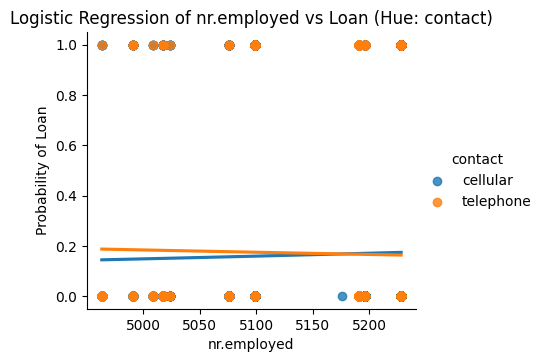

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_var:
    for j in categorical_var:
        sns.lmplot(
            x=i, 
            y='loan_binary', 
            hue=j,
            data=df_clean,
            logistic=True,
            height=3.5,
            aspect=1.2,
            ci = None
        )
        plt.title(f"Logistic Regression of {i} vs Loan (Hue: {j})")
        plt.xlabel(i)
        plt.ylabel("Probability of Loan")
        plt.show()

Because the difference in slope of the simple logistic regression models, this suggest that there is an interaction effect between age and marital status, euribor3m and marital status, nr.employed and marital status and con.price.idx and housing. 

## 5. Model Data Preprocessing

To prepare for logistic regression modeling, we conducted several preprocessing steps:

### 5.1 Create 0/1 Response Variable

We created a new binary response variable (`loan_binary`) from the original `loan` column, mapping "yes" to 1 and "no" to 0. This transformation ensures that the response variable is in a suitable format for binary classification modeling.

In [24]:
df_clean['loan_binary'] = df_clean['loan'].map({'yes': 1, 'no': 0})

/var/folders/st/nc2fpg710b7095gl4qp0ql3w0000gn/T/ipykernel_63925/876987112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['loan_binary'] = df_clean['loan'].map({'yes': 1, 'no': 0})


### 5.2 Create Feature Matrix and Target Array

We selected six explanatory variables based on preliminary exploration:
- age
- housing
- campaign
- emp.var.rate
- cons.price.idx
- euribor3m

Using these variables, we constructed the feature matrix `X` and the target array `y`, where `y` corresponds to the newly created `loan_binary` column.

In [25]:
features = ['age', 'housing', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m']
X = df_clean[features]
y = df_clean['loan_binary']

### 5.3 Standardize Numerical Features

To improve model interpretability and ensure that all numerical features are on a comparable scale, we standardized the following numerical explanatory variables:
- age
- campaign
- emp.var.rate
- cons.price.idx
- euribor3m

Standardization was performed using z-score normalization.

In [26]:
numerical_features = ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

/var/folders/st/nc2fpg710b7095gl4qp0ql3w0000gn/T/ipykernel_63925/3040081623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


### 5.4 Create Indicator Variables for Categorical Features

We converted the categorical variable `housing` into a dummy (indicator) variable using one-hot encoding, dropping the first category to avoid multicollinearity. This step ensures that all input features are numerical and appropriately formatted for logistic regression analysis.

In [27]:
X = pd.get_dummies(X, columns=['housing'], drop_first=True)

## 6. Feature Selection with k-Fold Cross-Validation

We conducted feature selection using LASSO regularization combined with 5-fold cross-validation, applied to a logistic regression model.

### 6.1 Rationale for Using LASSO

LASSO regularization was selected because it controls model complexity by shrinking coefficients toward zero. It not only improves model interpretability by selecting a sparse set of important features, but also mitigates the risk of overfitting, aligning with the goals of building a generalizable predictive model for binary outcomes.


### 6.2 Cross-Validation and Regularization Tuning

We generated 100 λ (regularization strength) values evenly spaced on a logarithmic scale from 10⁻² to 10².

For each λ:
- We fitted a logistic regression model with L1 penalty (lasso regularization).
- We evaluated its performance by calculating the mean 5-Fold cross-validated AUC score.


In [28]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
lambdas = np.logspace(-2, 2, 100)  # λ from 10^-2 to 10^2

In [30]:
from sklearn.linear_model import LogisticRegression
mean_cv_aucs = []
for lambda_val in lambdas:
    logistic_model = LogisticRegression(penalty='l1',solver='liblinear',C=1/lambda_val, max_iter=10000,random_state=42)
    auc_score = cross_val_score(logistic_model, X, y, cv=cross_val,scoring='roc_auc').mean()
    mean_cv_aucs.append(auc_score)

In [31]:
best_lambda_index = np.argmax(mean_cv_aucs)
best_lambda = lambdas[best_lambda_index]
best_auc = mean_cv_aucs[best_lambda_index]

print(f"Best λ (Regularization Strength): {best_lambda}")
print(f"Best Mean 5-Fold Cross-Validated AUC: {best_auc}")

Best λ (Regularization Strength): 1.0476157527896652
Best Mean 5-Fold Cross-Validated AUC: 0.5421815624833108


After evaluating all models, we selected the λ that produced the highest mean cross-validated AUC.

The results are summarized as follows:

- **Best λ (Regularization Strength):** 1.0476157527896652
- **Best Mean 5-Fold Cross-Validated AUC:** 0.5421815624833108

Although the mean cross-validated AUC was moderate, this outcome is reasonable given the relatively weak relationship between the selected explanatory variables and clients' loan-taking behavior.


### 6.3 Visualization

The following plot illustrates the relationship between regularization strength (λ) and the mean 5-Fold cross-validated AUC score.


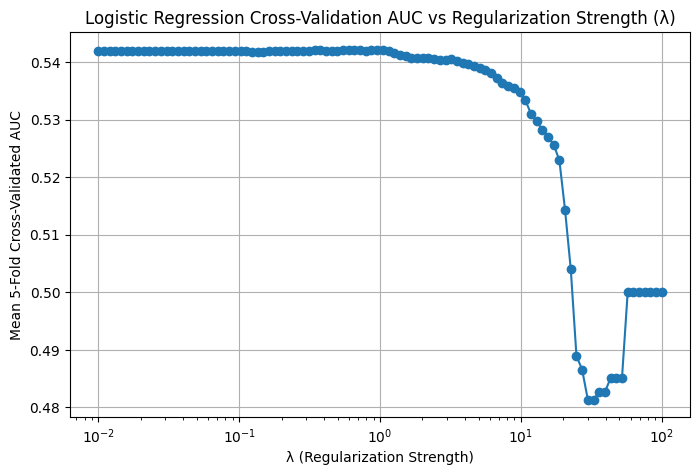

In [32]:
# plot λ vs Mean Cross-Validated AUC
plt.figure(figsize=(8,5))
plt.plot(lambdas, mean_cv_aucs, marker='o')
plt.xscale('log')
plt.xlabel('λ (Regularization Strength)')
plt.ylabel('Mean 5-Fold Cross-Validated AUC')
plt.title('Logistic Regression Cross-Validation AUC vs Regularization Strength (λ)')
plt.grid(True)
plt.show()

The plot shows that model performance initially remains stable as λ decreases, reaches a peak around λ ≈ 1.0476, and then declines as regularization weakens further.  
This behavior is consistent with the typical bias-variance trade-off observed in regularized modeling.


## 7. Best Model Discussion

### 7.1 Train-Test-Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 7.2 Fit the Chosen Model

In [34]:
best_lambda = 1.0476157527896652
C_val = 1 / best_lambda
lasso_best  = LogisticRegression(penalty="l1", solver="liblinear", C=C_val, random_state=42)
lasso_best.fit(X_train, y_train)

LogisticRegression(C=0.9545484566618336, penalty='l1', random_state=42,
                   solver='liblinear')

### 7.3 Equation

In [35]:
lasso_best.intercept_[0]

np.float64(-1.8190785610896067)

In [36]:
lasso_best.coef_

array([[-0.00134167, -0.08468371, -0.03617783, -0.05569953,  0.11492798,
         0.31322109]])

$$
\log\left(\frac{\hat{p}}{1 - \hat{p}}\right) = 
-1.8191 
- 0.0013 \cdot \text{age}
- 0.0847 \cdot \text{campaign}
- 0.0362 \cdot \text{emp.var.rate}
- 0.0557 \cdot \text{cons.price.idx}
+ 0.1149 \cdot \text{euribor3m}
+ 0.3132 \cdot \text{housing\_yes}
$$

### 7.4 Multicollinearity

In [37]:
X_train[X.columns].corr()

,age,campaign,emp.var.rate,cons.price.idx,euribor3m,housing_yes
age,1.000000,-0.012775,-0.023178,-0.007679,-0.018374,-0.006849
campaign,-0.012775,1.000000,0.167056,0.146481,0.151696,-0.025389
emp.var.rate,-0.023178,0.167056,1.000000,0.754781,0.970105,-0.067749
cons.price.idx,-0.007679,0.146481,0.754781,1.000000,0.654264,-0.097475
euribor3m,-0.018374,0.151696,0.970105,0.654264,1.000000,-0.063777
housing_yes,-0.006849,-0.025389,-0.067749,-0.097475,-0.063777,1.000000


We examined the correlation matrix of the standardized explanatory variables. The results show a very strong correlation between `emp.var.rate` and `euribor3m` (0.970). Similarly, `emp.var.rate` is also strongly correlated with `cons.price.idx` (0.755).

### 7.5 Slope Interpretations
Because all numerical variables in the model were standardized before fitting, the magnitudes of the logistic regression coefficients are directly comparable.

From our final model, `housing_yes` had the largest positive coefficient (0.313), suggesting that customers with housing loans are significantly more likely to take personal loans as well. The second most important variable was `euribor3m` (0.115), indicating that higher short-term interest rates are associated with higher loan-taking likelihood. Other variables, including `campaign`, `emp.var.rate`, and `cons.price.idx`, had negative but smaller coefficients, suggesting weaker or inverse relationships.

### 7.6 Overfitting Issue

Yes, our best model suggest that some of the original explanatory variables were overfitting the model. Our best LASSO model retained only 6 of the original 10 candidate predictors implies that several variables were overfitting the training data. We manually restricted the model to six predictors that showed the strongest theoretical or empirical relevance. LASSO regularisation was then applied to these six to stabilise their coefficients. Preliminary boxplots showed that these variables had only weak separation in the median `nr.employed` between classes.

We first narrowed the candidate list from 21 to six predictors based on exploratory plots and business rationale.  Variables such as `marital`, `contact`, and `loan` were excluded at this stage because they added little new information. LASSO was then applied to the six‑variable model; with λ ≈ 1.05 all six coefficients remain non‑zero, but the penalty shrinks them toward zero, mitigating overfitting without eliminating any of the chosen predictors.

A cross‑tab between `contact` and `housing` yields virtually very weak association between the two.  Likewise, `marital` shows negligible correlation  with the retained numerical features. These overfitting variables neither predict the outcome strongly nor provide information beyond what the remaining predictors already cover.

### 7.7 Test ROC and AUC

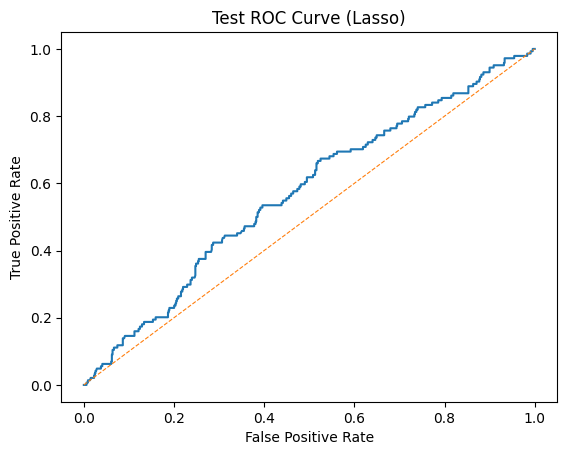

In [38]:
y_prob_test = lasso_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", lw=0.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC Curve (Lasso)")
plt.show()

In [39]:
roc_auc

np.float64(0.5712727617602428)

The resulting AUC was approximately 0.571, which suggests that the model performs only slightly better than random guessing when distinguishing between customers who take loans and those who do not. The ROC curve itself shows a improvement over the diagonal line, indicating some discriminatory power, but overall the predictive strength remains limited.

This outcome aligns with our earlier conclusion that the available explanatory variables may have limited predictive signal with respect to loan-taking behavior.

### 7.8 Best Predictive Probability Threshold

In [40]:
best_idx = np.argmax(tpr - fpr)
print(best_idx)
best_thresh = thresh[best_idx]
print(best_thresh)
best_tpr = tpr[best_idx]
print(best_tpr)
best_fpr = fpr[best_idx]
print(best_fpr)

168
0.15498649975636966
0.6736111111111112
0.5250379362670713


The optimal threshold was found to be approximately 0.155. At this cutoff, the model achieves a True Positive Rate of 0.674 and a False Positive Rate of 0.525.

## 8. Additional Analysis/Insight

We choose to conduct K-mean clustering.


In [41]:
features_num = ['age','campaign','emp.var.rate','cons.price.idx','euribor3m']
num_X_full = df_clean[features_num]
sil = {k: silhouette_score(num_X_full, KMeans(k, n_init=20, random_state=42).fit_predict(num_X_full)) for k in range(2,6)}
k = max(sil, key = sil.get)

In [42]:
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
df_clean["cluster"] = kmeans.fit_predict(num_X_full)
cluster_summary = (df_clean.groupby("cluster")["loan_binary"]
                    .agg(n_obs='size', loan_rate='mean').reset_index().sort_values("loan_rate"))
cluster_summary

/var/folders/st/nc2fpg710b7095gl4qp0ql3w0000gn/T/ipykernel_63925/2882659301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["cluster"] = kmeans.fit_predict(num_X_full)


,cluster,n_obs,loan_rate
1,1,1483,0.164531
0,0,2531,0.166337


Both clusters contain roughly 2⁄3 vs. 1⁄3 of the customers, yet their loan-taking rates are almost identical.

The near-equal loan propensities indicate that purely numeric attributes do not split customers into segments with materially different borrowing behaviour. This reinforces two earlier findings: 1. The logistic model’s moderate AUC (0.57). 2. The small absolute coefficients after LASSO.

Even though the clustering itself is not useful for targeting, the negative result is informative for our interpretation goal. It confirms that factors beyond the numeric variables, such as categorical attributes are likely needed to discriminate high-propensity borrowers.

## 9. Conclusion

### 9.1 Recommandation

Although our model achieved an test AUC of 0.571, indicating slightly better-than-random classification, this performance is `not high enough for practical deployment in marketing or loan approvals`. We `would not recommend using this model` in production without significant improvements. 

However, there is still partial utility for specific internal stakeholders like data analysts or policy researchers who value interpretability over raw predictive power. For instance, the coefficients suggest that customers with housing loans (housing_yes) and those responding during high euribor3m interest rates may be more likely to take personal loans, aligning with practical intuition. Still, these patterns are not strong enough to support targeted marketing campaigns without risk of inefficiency or misclassification.

### 9.2 Shortcomings/Caveats

While our LASSO model achieved the highest cross-validated AUC among those we tested, we `cannot be certain that it is the most optimal one`. We limited our exploration to logistic models and there could be other models that better capture non-linear patterns or complex feature interactions.

A more "complete" or extensive analysis would have included several additional techniques. First, we could have applied Ridge regression and Elastic Net regularization, both of which are designed to handle different feature correlations and may produce better generalization in certain settings. Additionally, comparing the regularized logistic models to a non-regularized logistic model would help assess whether regularization meaningfully improves generalization in this context. We also could have repeated our cross-validation with different values of k (e.g., k=10), or used stratified k-fold cross-validation to ensure that each fold preserved the class ratio more faithfully.

Also, our analysis demosntrate feature signal weakness. The small absolute magnitude of most coefficients (e.g., campaign: -0.0847, emp.var.rate: -0.0362) indicates that the explanatory variables have only weak associations with loan-taking behavior. This weak signal is further supported by the ROC curve's close proximity to the diagonal.

The third caveats is that the overall predictive performance of our model was limited. The best cross-validated AUC achieved was 0.571, indicating only a slight improvement over random guessing. This suggests that our explanatory variables may not carry enough predictive signal for the response variable. This limitation is further reinforced by our clustering analysis in Section 8, which showed nearly identical loan-taking rates across clusters formed only from numeric features. To truly improve prediction, future models would likely require additional features.

Another caveat is AUC's potential business utility. While AUC is useful for model comparison, it may not fully reflect business needs. At the chosen threshold (about 0.155), our model had a True Positive Rate of 0.674 and a False Positive Rate of 0.525, which is too high for real-world targeting campaigns. The potential cost of misclassification could outweigh the model's benefits.

In sum, while our methodology followed the core techniques covered in this regularized logistic regression and k-fold cross-validation, it is possible that our current approach missed more complex relationships or that the dataset itself lacks the richness needed for high-performing predictive models.

### 9.3 Future Works

A future work we can do is to explore non-linear and other models. Other than the models that we've learned, we can learn to use random forest, gradient boosting machines (e.g., XGBoost), or support vector machines to capture non-linear relationships or more complex interactions missed by logistic regression.

We could also create new features from interactions between categorical and numerical variables (e.g., age × marital, or housing × euribor3m) to explore hidden patterns.

Another thing we can do is apply stratification: since misclassification costs are likely asymmetric in a business context (false positives can be expensive), future models should incorporate weighted loss functions or stratified sampling.

We could also find a better dataset with additional behavioral or credit-based attributes such as past loan performance, credit scores, or online activity to apply our model fitting and analysis to see whether our model is good if we have a better dataset. 

## References

Strehl, A., Ghosh, J., & Mooney, R. J. (2002). Impact of similarity measures on web-page clustering. Workshop on Artificial Intelligence for Web Search.
This citation supports the claim about enhancing customer segmentation and targeted marketing through predictive models.

Stock, J. H., & Watson, M. W. (1999). Forecasting inflation. Journal of Monetary Economics, 44(2), 293–335.
This citation supports the claim about using predictive models for understanding economic trends and forecasting employment.